<img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/>

<h1>Hackwagon Academy DS102 - Problem Set 3</h1>
<hr>

This Problem Set consists of 20 questions, with each correct answer to be awarded 1 mark, totalling up to 20 marks.

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups.

Minor syntax errors are awarded half the mark for a question.

In [1]:
#Before you start, please perform the following 2 steps:
#1. Rename the file to FirstName_LastName Hackwagon Academy DS102 - Problem Set 3 e.g. John_Doe Hackwagon Academy DS102 - Problem Set 1

#2. Fill in your details here:
#Name                    : __Josey Tan Jun Han_____________________

#Start of Course Class(Edit accordingly): __25 Aug 2020 4pm____

# FOR TA/INSTRUCTOR 
# Total Marks:  / 20

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Credits 

This problem set is inspired by the [Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data). 

<img src="https://i.imgur.com/EYxHt9W.png" width=500>

## Context 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. 

Your first project is to help LendingClub prepare a prediction model to help them detect loan defaulters. Having already conducted the sufficient exploratory data analysis, your project manager, Silver, wants you to to prepare several machine learning models. Using the dataset which you have preprocessed, `loans_transformed-200k.csv`, you will have to create both <b>supervised and unsupervised machine learning models</b>. Additionally, the `all_loan_desc.csv` dataset prepared for you to prepare a model on the loans descriptions. 

There are a total of 4 parts to this problem set:

1. Naive Bayes Classifier - 9 marks
2. K-Means Clustering - 6 marks
3. Decision Tree Classifier - 3 marks
4. Performance Measures - 2 marks

## Naive Bayes Classifier - 9 marks

Another team has prepared for you all of the descriptions within the loans dataset. This dataset has filtered for you rows with descriptions and the target variable the loan status. Your task is to clean it further and use <b>Naive Bayes Classification</b> technique to develop a model for detecting loan defaulters.

### Open Loans Decription File 

Open the file `all_loan_desc.csv` and store it as `all_desc_df`.

What is the shape of `all_desc_df`?

In [3]:
import pandas as pd 


all_desc_df = pd.read_csv('all_loan_desc.csv')

all_desc_df.shape

(126067, 2)

### Q1. Integer Encoding

Tasks:

1. Observe the unique values in `loan_status`.  
2.  Create a new column `target` based on the values in `loan_status`. 

    Mapping:
    * `1` if `loan_status` contains `Charged Off`.
    * `0` otherwise



3. Reduce the dataframe to just the columns `desc` and `target`.

 or `Default`
 
 
**Expected Outputs:**
```
array(['Charged Off', 'Fully Paid', 'Current', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)
```

<img src="https://i.imgur.com/ztyxJh0.png">

In [4]:
display(all_desc_df['loan_status'].unique())

def loan_status(x):
    if  "Charged Off" in x: 
        x = 1
    else:
        x = 0
    return x

all_desc_df['target'] = all_desc_df['loan_status'].apply(loan_status)
all_desc_default_df = all_desc_df[['desc','target']]
all_desc_default_df.head()

array(['Charged Off', 'Fully Paid', 'Current', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

,desc,target
0,,1
1,,0
2,I currently have a loan out with CashCall. The...,0
3,Consolidate debt,0
4,This loan will be used solely to consolidate c...,0


In [5]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q2. Simple Cleaning

Conduct simple cleaning on the `desc` variable, such that the descriptions:

1. Contain only alphanumeric characters (<i>hint: use regular expression `"[^0-9a-zA-Z\ ]"`</i>)
2. Are entirely lowercase
3. Does not have leading or trailing spaces 

Also remove rows where `desc` is an empty string.

4. Are not empty strings (<i>hint: use filter to check for empty strings `''`</i>)


What is the shape of the dataset after cleaning?


**Expected Output:**
```
    125813 rows × 2 columns
```
<img src="https://i.imgur.com/pbLsgSa.png">

In [6]:
import re
def clean_names(title):
    title = re.sub("[^0-9a-zA-Z\ ]", "", title)
    title = title.lower()  # change to lower case
    title = title.strip()  # remove spaces at the beginning and end
    return title

all_desc_default_df['desc'] = all_desc_default_df['desc'].apply(clean_names)
all_desc_default_df = all_desc_default_df[all_desc_default_df['desc'] != '']
print(len(all_desc_default_df), 'rows', 'x', len(all_desc_default_df.columns), 'columns')
all_desc_default_df.head()

125813 rows x 2 columns


,desc,target
2,i currently have a loan out with cashcall the ...,0
3,consolidate debt,0
4,this loan will be used solely to consolidate c...,0
5,i have recently purchased and built a new home...,0
6,temporary cash flow challenges would like this...,0


In [7]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q3. Tokenize and Stem Words

For simplicity and lower processing time, you decided to use `PorterStemmer` to stem each word. As such, you would need to reduce each description to their root form. 

Steps: 

1. With the `nltk` library, use `word_tokenize` to tokenize each description to a list of words.
2. Use the `PorterStemmer` to stem each word using a for-loop. 
3. Join up the stemmed words as a string.

All steps above must be done <b>within the same function.</b> Your function should return a string.

Using the `apply()` method, create a new column called `desc_stem` in `all_desc_df`. 

<b>Note: This part might take awhile to run (an average of 3 minutes).</b>

<div class="alert alert-success">
<h3>Important: How to test and debug a smaller set first?</h3>

* Subset `all_desc_df` to 10 rows in `test_df`
* Test your code with the smaller set `test_df` first and observe the results in column `desc_stem`
* <b>Only when all is well, then run your code with the large dataset `all_desc_df`</b>
</div>

**Expected Output:**

<img src="https://i.imgur.com/XXDqd3i.png">

In [8]:
import nltk

# Downloading word corpus
nltk.download('punkt') # STEMMING
nltk.download('stopwords') # STOPWORDS

#test_df = all_desc_default_df.head(10)
#test_df

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def token_stem(x):
    tokenized = []
    tokenized.append(word_tokenize(x))
    stemmed = []
    for list in tokenized:
        for word in list:
            stemmed.append(stemmer.stem(word))
    result = " ".join(stemmed)
    return result


all_desc_default_df['desc_stem'] = all_desc_default_df['desc'].apply(token_stem)
all_desc_default_df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Josey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Josey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,desc,target,desc_stem
2,i currently have a loan out with cashcall the ...,0,i current have a loan out with cashcal the int...
3,consolidate debt,0,consolid debt
4,this loan will be used solely to consolidate c...,0,thi loan will be use sole to consolid credit c...
5,i have recently purchased and built a new home...,0,i have recent purchas and built a new home tha...
6,temporary cash flow challenges would like this...,0,temporari cash flow challeng would like thi lo...


In [9]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q4. Stop Words Removal

To keep only relevant words, you will remove all stopwords from each description by using the `stopwords` corpus to remove them. 

Steps: 

1. Create the list of stopwords in `english`
2. Tokenize the each description
3. Check for stopwords 
4. Join up non stopwords as a string

All steps, except step 1, must be done <b>within the same function.</b> Your function should return a string.

Using the `apply()` method, create a new column called `desc_cleaned` to the `all_desc_df`. 

<b>Note: This part might take awhile to run (an average of 2 minutes).</b>

<div class="alert alert-success">
    <h4>Again, how to test and debug a smaller set first?</h4>

* Subset `all_desc_df` to 10 rows in `test_df`
* Test your code with the smaller set `test_df` first and observe the results
* <b>Only when all is well, then run your code with the large dataset `all_desc_df`</b>
</div>

**Expected Output:**

Notice that the cleaned descriptions without stop words is stored in `desc_cleaned`

<img src="https://i.imgur.com/1fED4Uu.png">

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#test_df = all_desc_default_df.head(10)

STOP_WORDS = stopwords.words('english')

def stop_word(x):
    desc_tokens = word_tokenize(x)
    stemmed_no_stopwords = []
    for word in desc_tokens: 
        if word not in STOP_WORDS:
            stemmed_no_stopwords.append(word)
    result = " ".join(stemmed_no_stopwords)
    return result


all_desc_default_df['desc_cleaned'] = all_desc_default_df['desc_stem'].apply(stop_word)
all_desc_default_df.head()



,desc,target,desc_stem,desc_cleaned
2,i currently have a loan out with cashcall the ...,0,i current have a loan out with cashcal the int...,current loan cashcal interest rate 96 time too...
3,consolidate debt,0,consolid debt,consolid debt
4,this loan will be used solely to consolidate c...,0,thi loan will be use sole to consolid credit c...,thi loan use sole consolid credit card debt ac...
5,i have recently purchased and built a new home...,0,i have recent purchas and built a new home tha...,recent purchas built new home alway dream woul...
6,temporary cash flow challenges would like this...,0,temporari cash flow challeng would like thi lo...,temporari cash flow challeng would like thi lo...


In [11]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q5. Train Test Split

Remember why we need to do a train test split?

<img src="https://i.imgur.com/qOLmXIt.png" width=500/>

Split your data up into training and testing sets using `train_test_split` from `sklearn.model_selection`.  Split into into 4 different variables, `x_train`, `x_test`, `y_train` and `y_test`, where: 

- <b>first</b> argument: create a new dataframe from the `desc_cleaned` column of `all_desc_df` <b>(`all_desc_df[['desc_cleaned']]`)</b>
- <b>second</b> argument: should <b>only</b> be the `target` column of `all_desc_df`
- `random_state` is 0
- `test_size` is 0.2

Check the shapes of x_train, x_test, y_train, y_test.


**Expected Output:**

```
    x_train (100650, 1) x_test (25163, 1) y_train (100650,) y_test (25163,)
```


In [12]:
#!pip install sklearn
from sklearn.model_selection import train_test_split
#from sklearn import linear_model

#regr = linear_model.LinearRegression()


desc_cleaned = all_desc_default_df[['desc_cleaned']]
target = all_desc_default_df['target']

X1_train, X1_test, y1_train, y1_test = train_test_split(desc_cleaned, target, random_state=0, test_size=0.2,)

print('X1_train', X1_train.shape, 'X1_test', X1_test.shape,'y1_train', y1_train.shape,'y1_train', y1_test.shape,)

X1_train (100650, 1) X1_test (25163, 1) y1_train (100650,) y1_train (25163,)


In [13]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q6. Vectorizer

As you would be using the Naive Bayes Classifier for your model, you would need to transform your cleaned description into a document-term matrix of 1s and 0s (known as one-hot encoding). 

Use the `CountVectorizer` to `fit_transform()` your training-set's `desc_cleaned` column into a new document-term matrix, called `desc_matrix`.  Your training-set is in `x_train`.

(Q) How many columns are there in your one-hot encoded matrix `desc_matrix`?  What does these columns represent?

Expected Output:
```
    54993 columns
```

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
desc_matrix = vectorizer.fit_transform(X1_train['desc_cleaned'])
desc_matrix.shape
print(desc_matrix.shape[1], 'columns')
print('columns represent each categorical value (word) in desc_cleaned')

54993 columns
columns represent each categorical value (word) in desc_cleaned


In [15]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q7. Multinomial Naive Bayes Classifier 

Create a new `MultinomialNB` classifer and name it as `desc_classifier`.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#:~:text=The%20multinomial%20Naive%20Bayes%20classifier,tf%2Didf%20may%20also%20work">Documentation here</a>.

Then train the classifier using it's `.fit()` 

Use the vectorized document-term matrix, `desc_matrix`  as x and `y_train` as y.

In [16]:
from sklearn.naive_bayes import MultinomialNB

desc_classifier = MultinomialNB().fit(desc_matrix, y1_train)

In [17]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q8. Confusion Matrix

Congraluations on building your Naive Bayes model.  You would like to measure the model's performance using the TEST set.

Follow these steps:

1. Vectorize (transform) `desc_cleaned` column/variable in `x_test` and store in `x_matrix`
2. Generate the prediction results using the vectorized test set `x_matrix` and store in `predicted_results`
3. Create the confusion matrix using the predicted values and actual values in the TEST set and print it
4. Visualize the confusion matrix

**Expected Output:**

```
[[21033   261]
 [ 3760   109]]
```
<img src="https://i.imgur.com/ZGaiqnj.png" width=400>

[[21033   261]
 [ 3760   109]]


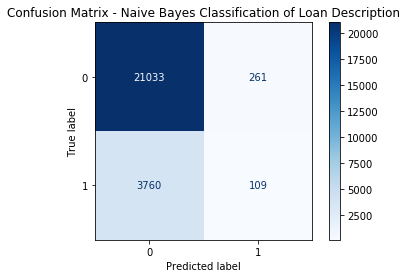

In [18]:
x_matrix = vectorizer.transform(X1_test['desc_cleaned'])
predicted_results =  desc_classifier.predict(x_matrix)
#print(predicted_results)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_predicted = confusion_matrix(y1_test, predicted_results)

print(cm_predicted)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

titles_option = [("Confusion Matrix - Naive Bayes Classification of Loan Description", desc_classifier)]

for title, classifier in titles_option:
    disp = plot_confusion_matrix(desc_classifier, x_matrix, y1_test, values_format='d',
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title(title)
    #print(disp.confusion_matrix)

plt.show()


In [19]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q9. How good is the performance of Naive Bayes Model?

Is the model good at predicting Loan defaults?  

What is the accuracy of predicting loan defaults (recall)?  

What is the accuracy of predicting non-defaults?

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, predicted_results))

#the model is bad at predicting loan defaults. the accuracy for predicting non-default is very good while it is bad for default

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     21294
           1       0.29      0.03      0.05      3869

    accuracy                           0.84     25163
   macro avg       0.57      0.51      0.48     25163
weighted avg       0.76      0.84      0.78     25163



In [21]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

## K-Means Clustering - 6 marks

To discover more insights about the dataset, you decided to run the K-means clustering algorithm to discover the different clusters in the dataset. 

### Open Loans Data (Non-Description) File

Open the `loans_transformed-200k.csv` as `all_loans_df`. 

In [22]:
import pandas as pd 

all_loans_df = pd.read_csv('loans_transformed-200k.csv')
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,delinq_2yrs,loan_status,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,1.0,Current,0,10,0,1,1,8175.0,14,Non Default
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,0.0,Current,0,3,0,1,3,0.0,10,Non Default
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,0.0,Current,0,3,0,1,3,10350.0,18,Non Default
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,0.0,Current,1,0,1,2,1,4950.0,18,Non Default
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,0.0,Current,0,10,0,2,1,0.0,13,Non Default


### Q10. Integer Encoding

Just as the above Integer Encoding question, create a new column called `target_int` where `Non Default` is `0` and `Default` is `1`. 

**Expected Output:**

<img src="https://i.imgur.com/D0VcNAs.png"/>

In [23]:

def target_int(x):
    if  "Non Default" in x: 
        x = 0
    else:
        x = 1
    return x

all_loans_df['target_int'] = all_loans_df['target'].apply(target_int)
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,loan_status,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target,target_int
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,Current,0,10,0,1,1,8175.0,14,Non Default,0
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,Current,0,3,0,1,3,0.0,10,Non Default,0
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,Current,0,3,0,1,3,10350.0,18,Non Default,0
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,Current,1,0,1,2,1,4950.0,18,Non Default,0
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,Current,0,10,0,2,1,0.0,13,Non Default,0


In [24]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q11. Reduce to Numerical Data

For K-means algorithm to work properly, your dataframe should only contain numeric variables/columns (i.e. only numbers). 

Select only numeric variables/columns from your dataframe.

You also decided to drop the `int_round` and `income_tax` columns as they are similar to the other columns in the dataset. 

Store this dataframe as `loans_numeric_df`. 

**Expected Output:**

<img src="https://i.imgur.com/6nwgt0k.png">

In [25]:
import numpy as np
loans_numeric_df = all_loans_df.select_dtypes(include=[np.number]).drop(['int_round','income_tax'], axis = 1)
loans_numeric_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,target_int
0,14400,14.47,495.46,109000.0,8.52,1.0,0,10,0,1,1,0
1,8000,10.75,260.97,50000.0,17.31,0.0,0,3,0,1,3,0
2,9500,18.45,345.60,138000.0,23.91,0.0,0,3,0,1,3,0
3,16000,18.99,414.97,66000.0,33.65,0.0,1,0,1,2,1,0
4,6800,13.99,232.38,63000.0,19.68,0.0,0,10,0,2,1,0


In [26]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q12. Select Optimal K - Elbow Plot

Plot the elbow plot by doing multiple iterations of the k-means algorithm, between a value of <b>2 to 12 (inclusive)</b>. Select a K that you think is appropriate to carry on in the next step. 

<b>Note: This will take about 2 minutes to compute all possible K values</b>

**Expected Output:**

<img src="https://i.imgur.com/yVp1qJL.png">

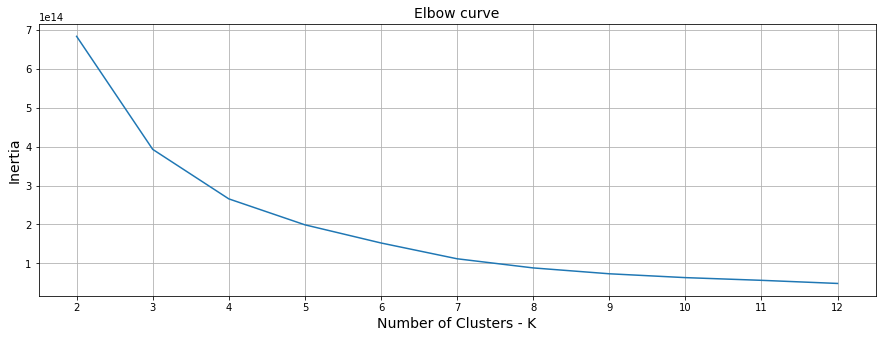

In [27]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

X = loans_numeric_df # <<< Numerical DataFrame here
distorsions = []

# Find the optimum number of clusters
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 13), distorsions)
plt.grid(True)
plt.title('Elbow curve', fontsize=14)
plt.xticks(np.arange(2,13))
plt.xlabel('Number of Clusters - K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()

In [28]:
## TA/INSTRUCTOR ONLY
## PLOT MARK: 1/1

### Q13. K-Means Clustering with Optimal K - 2 Marks

Choose an <b>appropriate K</b> based on the chart above, then apply the k-means algorithm only once and store the model as `loans_kmeans`.

Make sure `random_state` is 0.

In [29]:
k = 8
model = KMeans(n_clusters=k,  # < Initialise Number Of Clusters here
               random_state=0)

loans_kmeans = model.fit(loans_numeric_df) # < DataFrame of All Variables
print(loans_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [30]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q14. Set Labels

All loans are now tagged with a particular cluster or label. 

Using the `.labels_` attribute, create and add a new column named `label` to the `all_loans_df` dataframe. 

**Expected Output:** (for k = 8) 

A part of the dataset with the label column will look like the following.  

<div class="alert alert-success">
Don't worry if your label numbers are different from the expected output.  This is because of the difference in random sampling on each computer.
</div>

<img src="https://i.imgur.com/CXbcmaW.png" width=400>

In [31]:
all_loans_df['label'] = loans_kmeans.labels_
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target,target_int,label
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,0,10,0,1,1,8175.0,14,Non Default,0,6
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,0,3,0,1,3,0.0,10,Non Default,0,3
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,0,3,0,1,3,10350.0,18,Non Default,0,6
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,1,0,1,2,1,4950.0,18,Non Default,0,0
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,0,10,0,2,1,0.0,13,Non Default,0,0


In [32]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q15. Clustering Analysis

Now that you've labelled each loans, you want know the <b>proportion of default loans</b> within each cluster.  

<div class="alert alert-success">
Your answer may be different from the expected output due to the randomness of K means. It is fine as long as you calculate the values in the correct way.
</div>

**Expected Output:** (for k = 8) 

```
label  target     
0      Default        0.112868
       Non Default    0.887132
1      Default        0.090909
       Non Default    0.909091
2      Default        0.078322
       Non Default    0.921678
3      Default        0.133080
       Non Default    0.866920
4      Default        0.062500
       Non Default    0.937500
5      Non Default    1.000000
6      Default        0.090710
       Non Default    0.909290
7      Default        0.055154
       Non Default    0.944846
dtype: float64
```


In [33]:
total_label_size = all_loans_df.groupby('label')['target_int'].agg('count')

each_label_target_size = all_loans_df.groupby(['label','target'])['target_int'].agg('count')

proportion = all_loans_df.groupby(['label','target'])['target_int'].agg('count')/all_loans_df.groupby('label')['target_int'].agg('count')

proportion

label  target     
0      Default        0.112868
       Non Default    0.887132
1      Default        0.090909
       Non Default    0.909091
2      Default        0.078322
       Non Default    0.921678
3      Default        0.133080
       Non Default    0.866920
4      Default        0.062500
       Non Default    0.937500
5      Non Default    1.000000
6      Default        0.090710
       Non Default    0.909290
7      Default        0.055154
       Non Default    0.944846
Name: target_int, dtype: float64

In [34]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

## Decision Tree Classifier - 3 marks

### Q16. Train Test Split

Similar to what you did using the Naive Bayes Classifier, split `loans_numeric_df` using `train_test_split()` into 4 different variables, `x_train`, `x_test`, `y_train` and `y_test`: 

- <b>first</b> argument should be a dataframe containing <b>all columns except</b> the `target_int` column
- <b>second</b> argument should <b>only</b> be the `target_int` column
- `random_state` is 0
- `test_size` is 0.2

In [35]:
df_x = loans_numeric_df.drop('target_int', axis = 1)
df_y = loans_numeric_df['target_int']


X2_train, X2_test, y2_train, y2_test = train_test_split(df_x, df_y, random_state=0, test_size=0.2)

In [36]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q17. Train the DecisionTree

Create a new Decision Tree named `loans_clf` using scikit-learn's `DecisionTreeClassifier`

Train it with the training set using `.fit()` 

Training set is in `x_train` and `y_train` variables. 


<b>Note: `random_state` should be `0`.</b>

In [37]:
from sklearn.tree import DecisionTreeClassifier

iris_dtree = DecisionTreeClassifier(random_state=0) 
iris_dtree.fit(X2_train, y2_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q18. Confusion Matrix

Print the confusion matrix

Visualize the confusion matrix

Plot the confusion matrix for the decision tree classifier by:

1. Using `.predict` on the `x_test` to get the test results
2. Use `sns.heatmap` to create confusion matrix
3. Set `.ylim()` to (2,0)
4. Set `.xlim()` to (0,2)

**Expected Output:**

```
[[31050  4293]
 [ 3727   930]
```
<img src="https://i.imgur.com/UTSrTST.png" width=400>

[[31050  4293]
 [ 3727   930]]


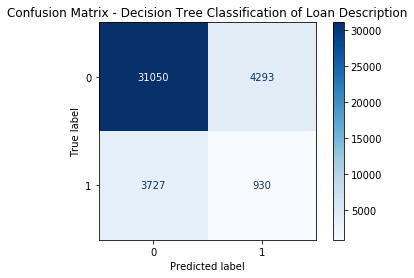

In [39]:
#x_matrix = vectorizer.transform(X_test['desc_cleaned'])
predicted_results1 =  iris_dtree.predict(X2_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_dt_predicted = confusion_matrix(y2_test, predicted_results1)

print(cm_dt_predicted)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

titles_option = [("Confusion Matrix - Decision Tree Classification of Loan Description", iris_dtree)]

for title, classifier in titles_option:
    disp = plot_confusion_matrix(iris_dtree, X2_test, y2_test, values_format='d',
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title(title)
    

plt.show()

In [40]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

## Performance Measures - 2 marks

### Q19. Accuracy & Precision

Based on the above confusion matrices, calculate, <b>with workings</b>, the <b>Accuracy and Precision</b> for the:

1. Naive Bayes Classifier
2. Decision Tree Classifier

In [41]:
# Accuracy = TP + TN / P + N
# Precision = TP / TP + FP

#Navie Bayes Classifier
NB_classifier_accuracy = (cm_predicted[1,1] + cm_predicted[0,0]) / (cm_predicted[1,1] + cm_predicted[1,0] + cm_predicted[0,1] + cm_predicted[0,0])
NB_classifier_precision1 = cm_predicted[1,1] / (cm_predicted[0,1] + cm_predicted[1,1] )
NB_classifier_precision2 = cm_predicted[0,0] / (cm_predicted[0,0] + cm_predicted[1,0] )
print('Navie Bayes CLassifier accuracy : {:.4f} '.format(NB_classifier_accuracy))
print('Navie Bayes CLassifier precision for non default loan: {:.2f}'.format(NB_classifier_precision2))
print('Navie Bayes CLassifier precision for default loan: {:.2f}\n'.format(NB_classifier_precision1))
#print("Navie Bayes CLassifier accuracy", desc_classifier.score(x_matrix, y1_test))
#print(classification_report(y1_test, predicted_results))

#Decision Tree Classifier
DT_classifier_accuracy = (cm_dt_predicted[1,1] + cm_dt_predicted[0,0]) / (cm_dt_predicted[1,1] + cm_dt_predicted[1,0] + cm_dt_predicted[0,1] + cm_dt_predicted[0,0])
DT_classifier_precision1 = cm_dt_predicted[1,1] / (cm_dt_predicted[0,1] + cm_dt_predicted[1,1] )
DT_classifier_precision2 = cm_dt_predicted[0,0] / (cm_dt_predicted[0,0] + cm_dt_predicted[1,0] )
print('Decision Tree Classifier accuracy : {:.4f}'.format(DT_classifier_accuracy))
print('Decision Tree Classifier precision for non default loan: {:.2f}'.format(DT_classifier_precision2))
print('Decision Tree Classifier precision for default loan: {:.2f}\n'.format(DT_classifier_precision1))


#print("Decision Tree Classifier accuracy", iris_dtree.score(X2_test, y2_test))
#print(classification_report(y2_test, predicted_results1))

Navie Bayes CLassifier accuracy : 0.8402 
Navie Bayes CLassifier precision for non default loan: 0.85
Navie Bayes CLassifier precision for default loan: 0.29

Decision Tree Classifier accuracy : 0.7995
Decision Tree Classifier precision for non default loan: 0.89
Decision Tree Classifier precision for default loan: 0.18



In [42]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q20. Model Assessment

After assessing the accuracy and precision scores, do you think that the models above are reliable in predicting whether loans will be defaulted? Explain your answer.  

In [43]:
print('The accuracy of the models is good for predicting the non default loan but it is bad for predicting defaulted loans as the \n precision for defaulted loans is low, making it unreliable.')

The accuracy of the models is good for predicting the non default loan but it is bad for predicting defaulted loans as the 
 precision for defaulted loans is low, making it unreliable.


In [44]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

<div class="alert alert-success">
<b>Checkpoint</b>: When you have completed, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will <b>override</b> it.
</div>